In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from dateutil.relativedelta import relativedelta
import pandas as pd
from sklearn.model_selection import train_test_split


import matplotlib.style as style 
import warnings
warnings.simplefilter('ignore')

'?' denoting the missing values. 
We need to replace them with NaN

In [2]:
missing_values = ["?"]
data = pd.read_csv('ml_dataset.csv', index_col= 'id', na_values = missing_values)

In [3]:
data.head()

,age,worklass,fnlwgt,education,education-num,martial-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
id,,,,,,,,,,,,,,,
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
worklass          30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
martial-status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [5]:
import pandas_profiling as pp

In [6]:
pp.ProfileReport(data)

Number of variables,15
Number of observations,32561
Total Missing (%),0.9%
Total size in memory,4.0 MiB
Average record size in memory,128.0 B
Numeric,6
Categorical,9
Boolean,0
Date,0
Text (Unique),0
Rejected,0


### There are missing value in the folowing columns :
- occupation
- worklass
- native-country

# Exploratory Data Analysis

Now, need to convert the categorical values to numeric

In [7]:
for column in ['worklass', 'occupation', 'native-country']:
    data[column].fillna(data[column].mode()[0], inplace=True)

Text(0.5, 0, 'features')

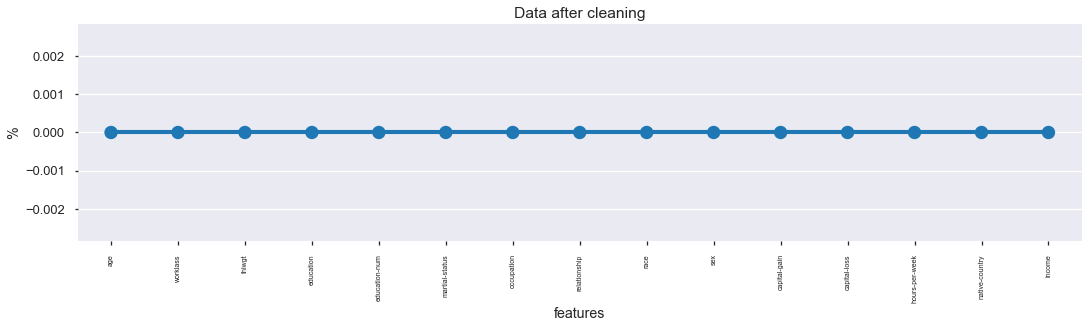

In [8]:
data_after = pd.DataFrame((data.isnull().sum())*100/ data.shape[0]).reset_index()

%matplotlib inline
plt.style.use('seaborn-talk')
fig = plt.figure(figsize=(18,4))

ax = sns.pointplot('index',0, data=data_after)
plt.xticks(rotation =90,fontsize =7)
plt.title('Data after cleaning')
plt.ylabel("%")
plt.xlabel("features")

In [9]:
# types of data
data.dtypes.value_counts()

object    9
int64     6
dtype: int64

In [10]:
# column name with object data type
data.select_dtypes(include=[object]).apply(pd.Series.nunique, axis = 0)

worklass           8
education         16
martial-status     7
occupation        14
relationship       6
race               5
sex                2
native-country    41
income             2
dtype: int64

Text(0.5, 1.0, 'Correlation')

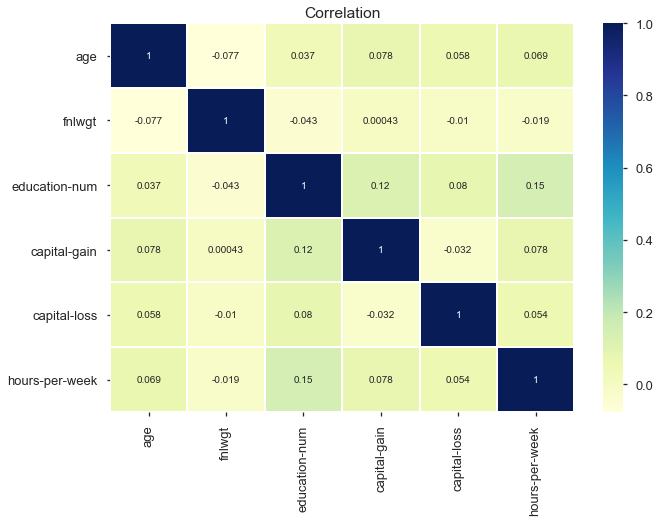

In [11]:
#correlation map
sns.heatmap(data.corr(),annot=True,linewidths=.9,cmap="YlGnBu")
plt.title('Correlation')

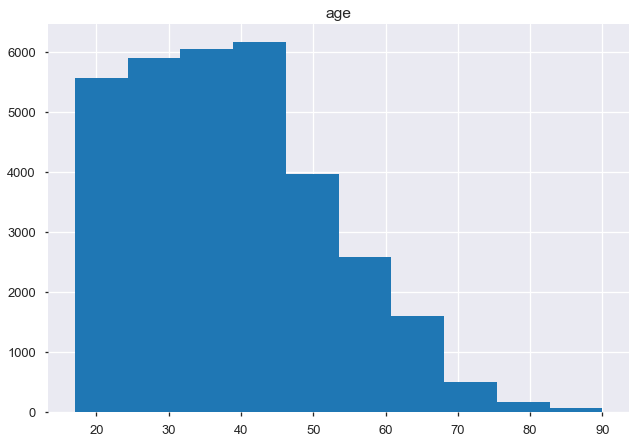

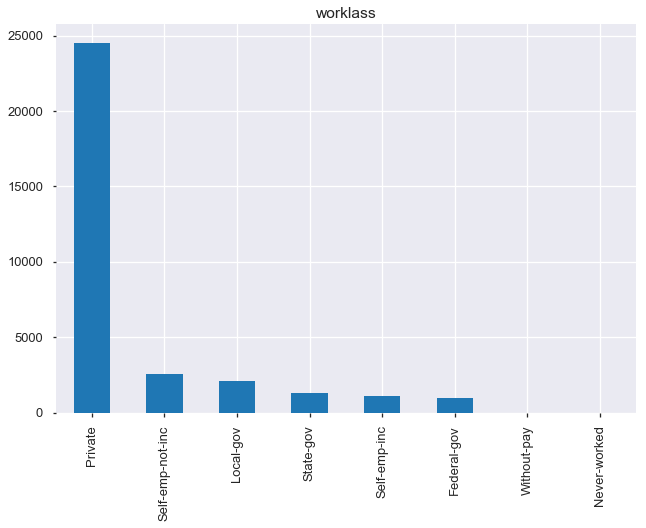

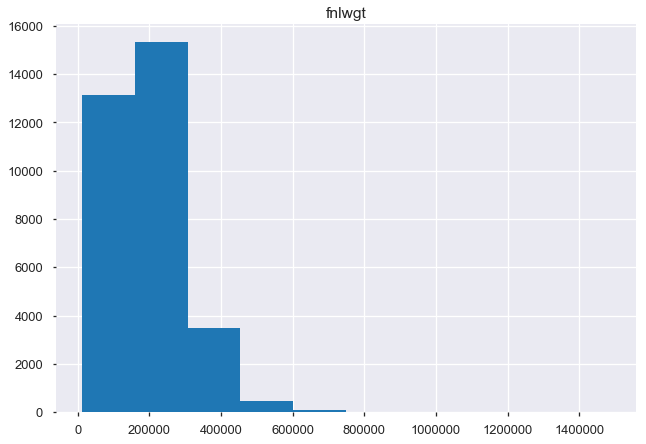

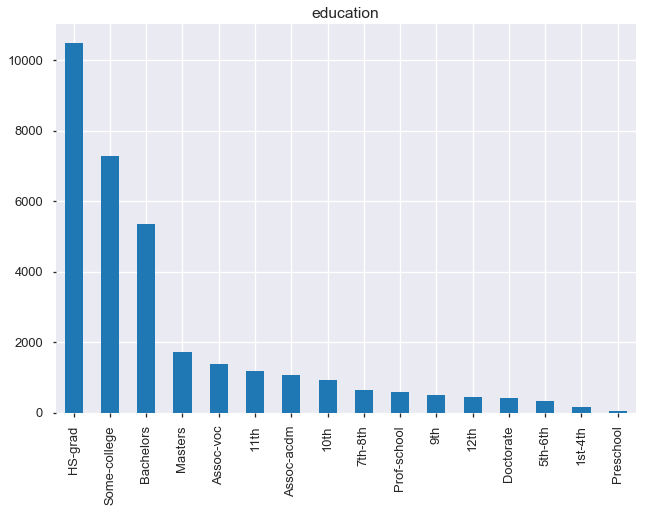

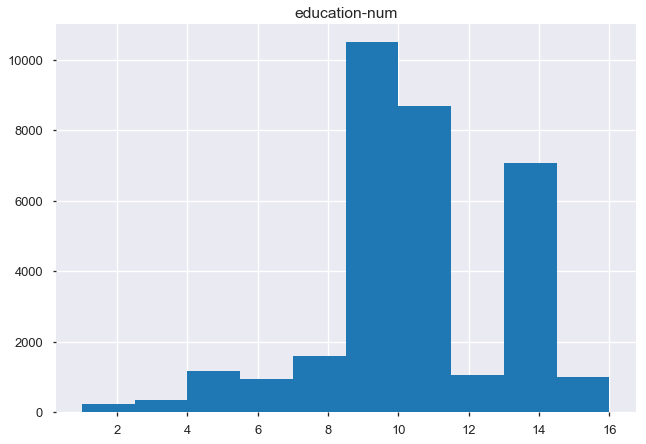

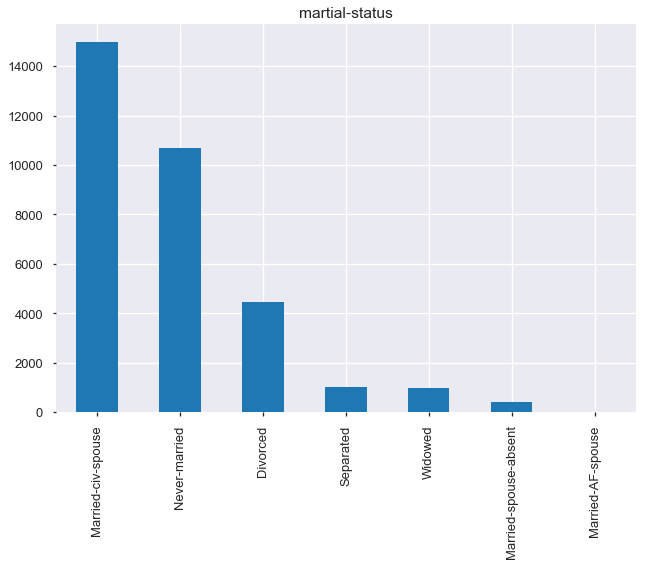

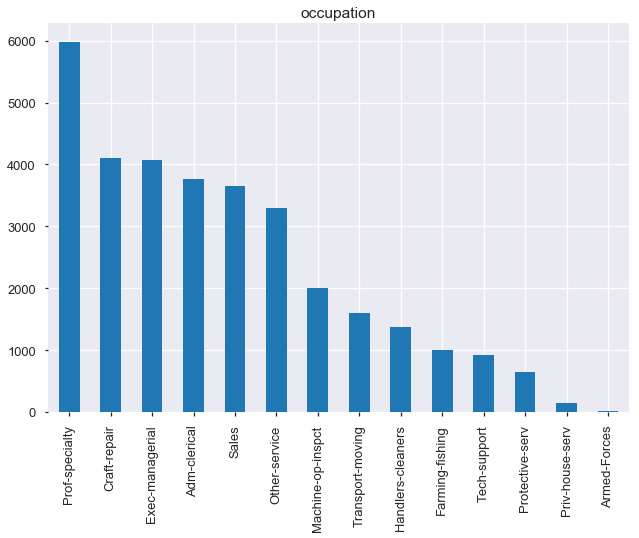

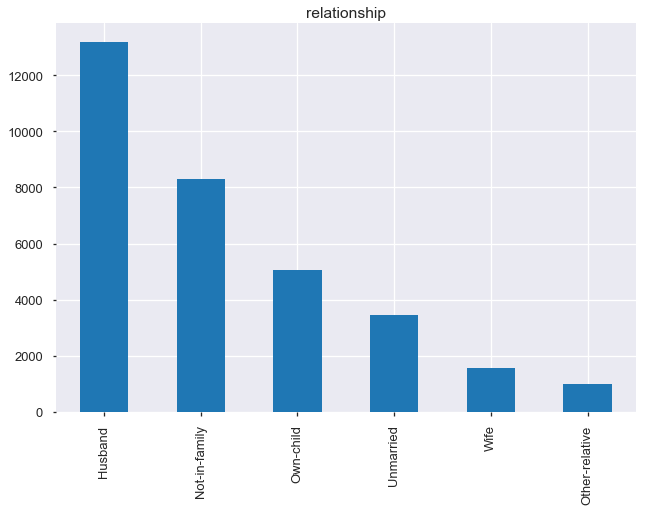

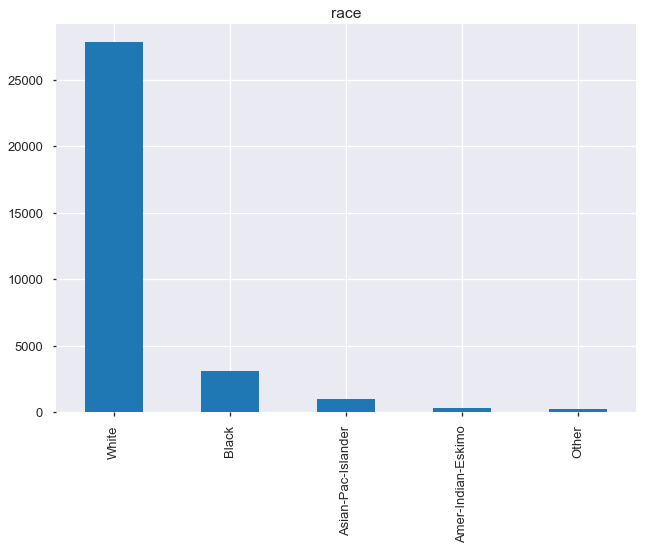

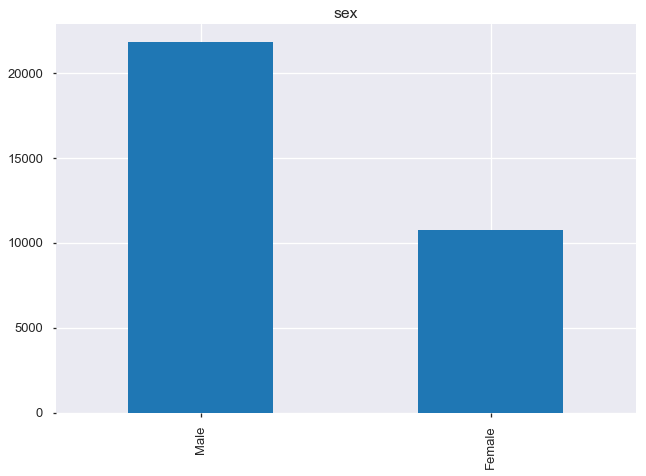

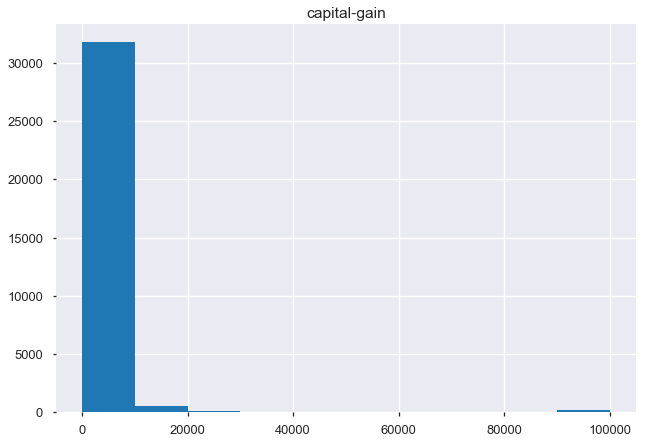

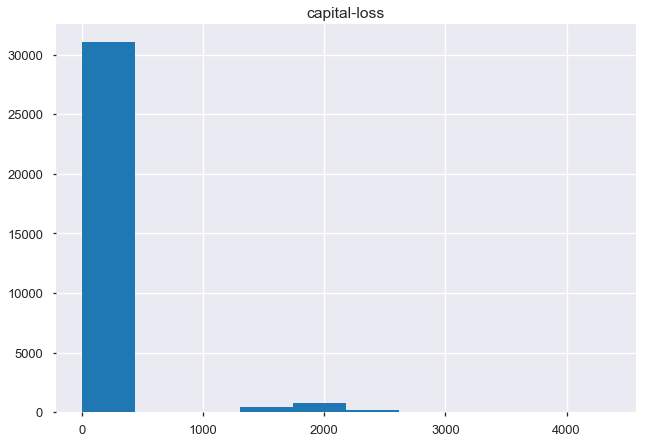

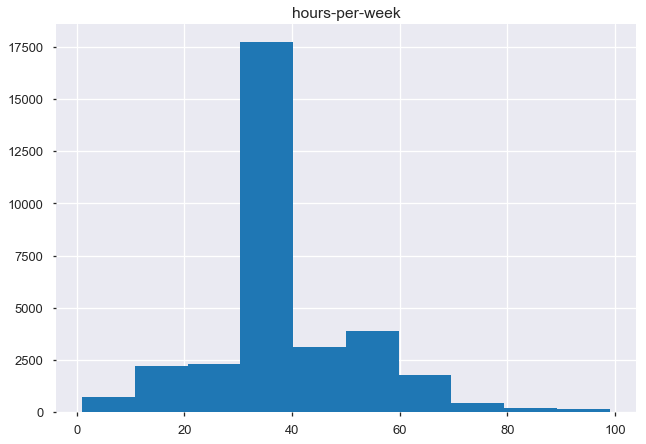

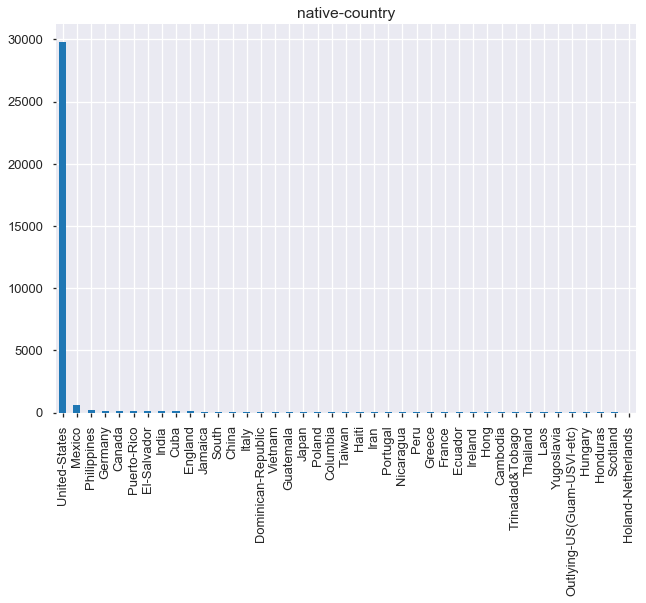

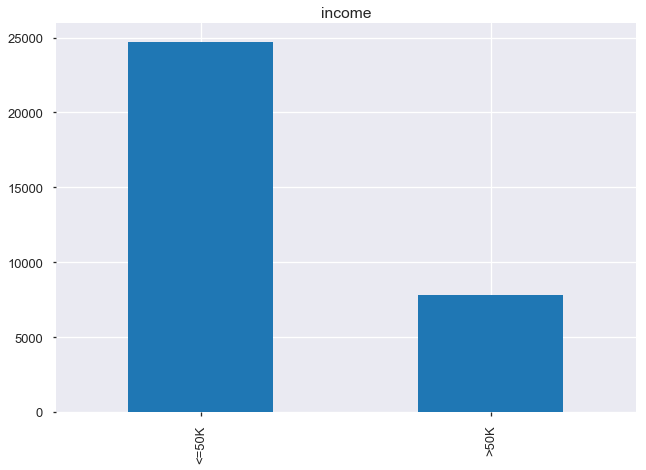

In [12]:
import matplotlib.pyplot as plt
import numpy as np
for column in data.columns:
    if data.dtypes[column] == np.object:
        data[column].value_counts().plot(kind="bar", title=column)
    else:
        data[column].hist()
        plt.title(column)
    plt.show()

In [14]:
data.nunique()

age                  73
worklass              8
fnlwgt            21648
education            16
education-num        16
martial-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       41
income                2
dtype: int64

# Encode Data

Let's generate some features

In [15]:
data['capital-gain_c'] = data['capital-gain'].apply(lambda x: 1 if x !=0 else 0 )
data['capital-loss_c'] = data['capital-loss'].apply(lambda x: 1 if x !=0 else 0 )

data['hours-per-week_c'] = data['hours-per-week'].apply(lambda x: '0-40' 
                                                       if x < 40 
                                                       else '40' 
                                                       if x == 40
                                                       else '+40' )
data['education_c'] = data['education'].apply(lambda x: 'Drop-out' 
                                             if x in ['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'] 
                                             else x)

data['martial-status_c'] = data['martial-status'].apply(lambda x: 'Not-married' 
                                             if x in ['Separated','Divorced','Married-spouse-absent'] 
                                             else 'Married' 
                                             if x in ['Married-civ-spouse','Married-AF-spouse']
                                             else 'Never-married' 
                                             if x in ['Never-married']
                                             else 'Widowed')

data['worklass_c'] = data['worklass'].apply(lambda x: 'Self-emp' 
                                             if x in ['Self-emp-not-inc','Self-emp-inc'] 
                                             else 'Private' 
                                             if x in ['Private']
                                             else 'Without-pay' 
                                             if x in ['Without-pay','Never-worked']
                                             else 'Gov')

data['age_c'] = data['age'].apply(lambda x: '0-20'
                                            if x <= 20 
                                            else '20-30' 
                                            if x >20 and x<=30
                                            else '30-40' 
                                            if x >30 and x<=40
                                            else '40-50' 
                                            if x >40 and x<=50
                                            else '+50')

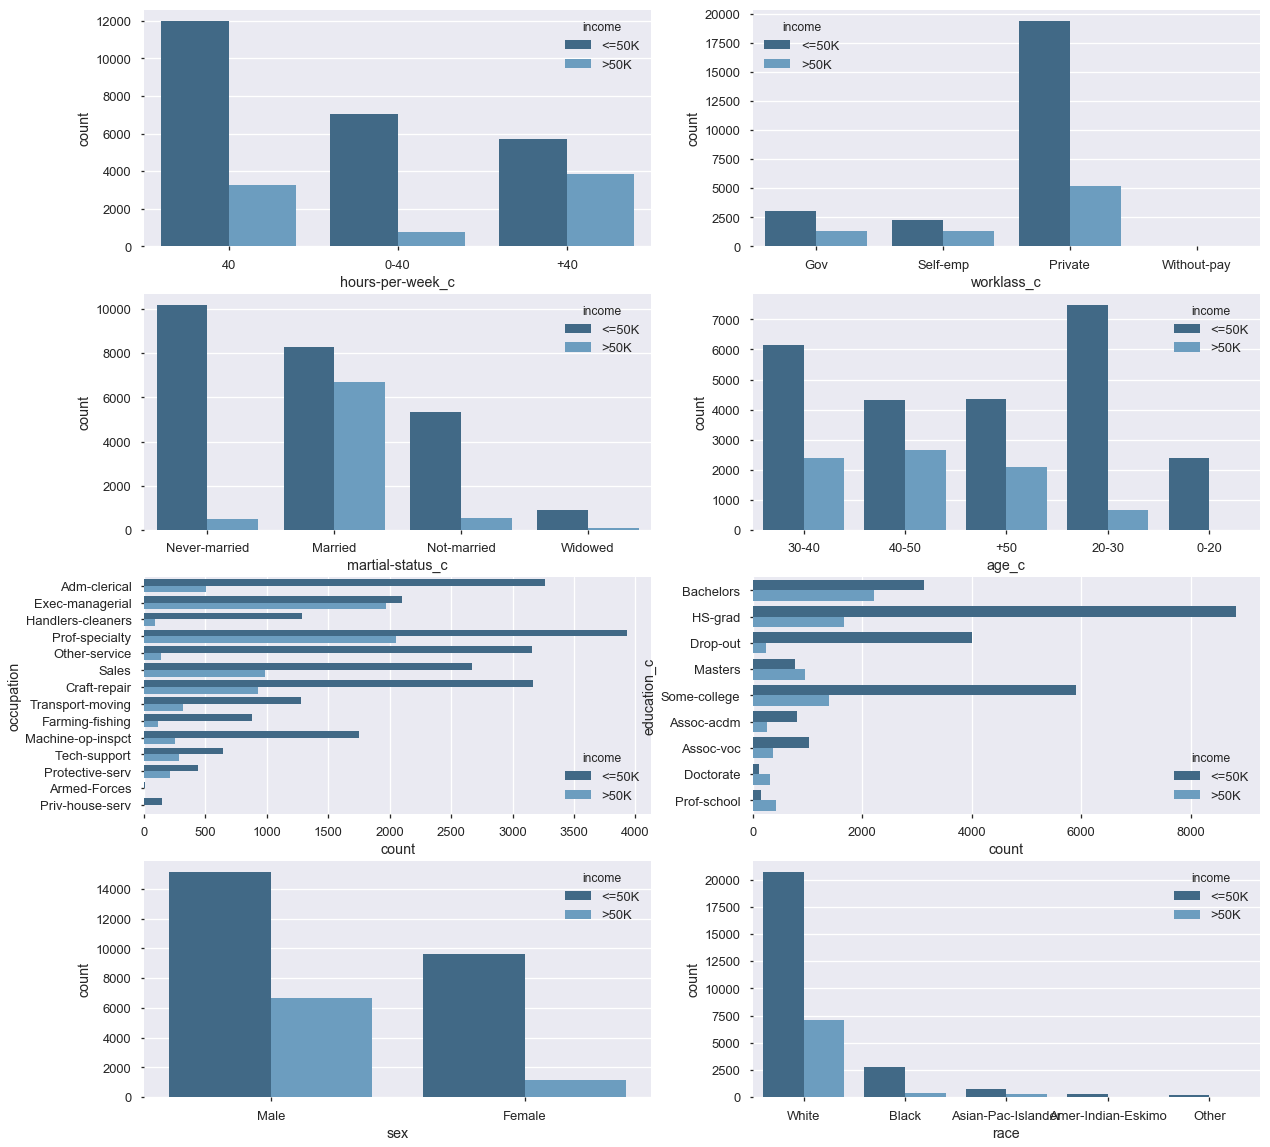

In [16]:
f, axes = plt.subplots(4, 2, figsize=(20,20))
sns.countplot(x='hours-per-week_c', hue='income', data = data, palette="Blues_d",ax=axes[0][0])
sns.countplot(x='worklass_c', hue='income', data = data, palette="Blues_d",ax=axes[0][1])
sns.countplot(x='martial-status_c', hue='income', data = data, palette="Blues_d",ax=axes[1][0])
sns.countplot(x='age_c', hue='income', data = data, palette="Blues_d",ax=axes[1][1])
sns.countplot(y='education_c', hue='income', data = data, palette="Blues_d",ax=axes[2][1])
sns.countplot(y='occupation', hue='income', data = data, palette="Blues_d",ax=axes[2][0])
sns.countplot(x='sex', hue='income', data = data, palette="Blues_d",ax=axes[3][0])
sns.countplot(x='race', hue='income', data = data, palette="Blues_d",ax=axes[3][1])

- Hours_per_week

The percentage of people that have >50k strongly  decreases when they work less than 40 hours per week, and increases significantly when they work greater than  40 hours per week. 

- Workclass

The majority of the individuals work in the private sector.

- Martial_status

The never-maried people have low chance to get an income >50k.

- Age

Because there are so many ages being represented, I use age intervals.The most interesting are  0-20, 20-30 groups they have no chance to get an income >50k

- Education

For the most causes, a higher level of education is correlated with a salary higher with label >50k. One interesting things is that the separation of salary >50k to <=50k is almost the same between doctorate and Prof school.   

- Ocupation

Exec_managerial and prof_specialty have very high number of  individuals making >50k. And the number for Handlers_cleaners , Farming_fishing,  Other_service are lower.

- Race

Whites have a larger percentage of entries >50k than the rest races. But, the number of Whites people in the dataset is disproportionately large. 

- Sex

The number of males who make >50k is much greater than number of females.

In [17]:
data['income'] = data['income'].apply(lambda x: 1 if x !='<=50K' else 0 )

In [18]:
data.columns

Index(['age', 'worklass', 'fnlwgt', 'education', 'education-num',
       'martial-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income', 'capital-gain_c', 'capital-loss_c', 'hours-per-week_c',
       'education_c', 'martial-status_c', 'worklass_c', 'age_c'],
      dtype='object')

In [19]:
columns_to_use = [  'sex', 
                   'age', 
                   'worklass', 'worklass_c',
                   #'fnlwgt', 
                   #'education', 'education-num',
                   'education_c',
                   'martial-status', 'martial-status_c',
                   'occupation', 
                   'relationship', 
                     #'race', 
                   'capital-gain', #'capital-gain_c','capital-loss_c',
                   'capital-loss', 
                   'hours-per-week','hours-per-week_c',
                   'native-country'
]

Now, need to convert the categorical values to numeric by One-hot encoding

In [20]:
binary_data = pd.get_dummies(data[columns_to_use])

# Train-test separation

In [21]:
data.dropna().drop_duplicates()
X_train, X_test, y_train, y_test = train_test_split(binary_data, data['income'], test_size=0.33, random_state=42)
X_val, X_test_val, y_val, y_test_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [24]:
from sklearn.model_selection import (cross_val_score  ,StratifiedKFold )
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, auc, confusion_matrix, accuracy_score, f1_score,recall_score,precision_score
from os import cpu_count

#  Working on different models

It’s a good habit to try a variety of ML algorithms, it can be especially good with imbalanced datasets. 
Decision trees frequently perform well on imbalanced data. 

Accuracy is not the best metric to use when evaluating imbalanced datasets as it can be very misleading. 

Metrics that can provide better insight include:

- Confusion Matrix;
- Precision;
- Recall;
- F1;
- Area Under P-R Curve.

### DecisionTreeClassifier, RandomForestClassifier, BalancedBaggingClassifier

In [25]:
n_jobs = max(cpu_count()-1, 1)
X_train = X_train
y_train = y_train
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print('------------ DecisionTreeClassifier ---------------')
dt = DecisionTreeClassifier()
scores_dt = cross_val_score(estimator=dt,
    X=X_train,
    y=y_train,
    scoring='f1',
    cv=kf, 
    n_jobs=n_jobs).mean()
print('CV_dt f1 scoring: {:.2f}'.format(scores_dt))

dt.fit(X_train, y_train)
pred_dt=dt.predict(X_test)


print('cm:', confusion_matrix(y_test,pred_dt))

print('Accuracy:',accuracy_score(y_test, pred_dt))
print('f1_score:',f1_score(y_test, pred_dt))
print('recall_score:',recall_score(y_test, pred_dt))
print('precision_score',precision_score(y_test, pred_dt))

precision, recall, thresholds = precision_recall_curve(y_test, pred_dt)
area = auc(recall, precision)
print("Area Under P-R Curve: ",area)

print('------------ BalancedBaggingClassifier ---------------')
print('------ base_estimator=DecisionTreeClassifier ---------')

bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=42)

scores_bbc = cross_val_score(estimator=bbc,
    X=X_train,
    y=y_train,
    scoring='f1',
    cv=kf, 
    n_jobs=n_jobs).mean()
print('CV_bbc f1 scoring: {:.2f}'.format(scores_bbc))

bbc.fit(X_train, y_train)
pred_bbc = bbc.predict(X_test)


print('cm:', confusion_matrix(y_test,pred_bbc))

print('Accuracy:',accuracy_score(y_test, pred_bbc))
print('f1_score:',f1_score(y_test, pred_bbc))
print('recall_score:',recall_score(y_test, pred_bbc))
print('precision_score',precision_score(y_test, pred_bbc))

precision, recall, thresholds = precision_recall_curve(y_test, pred_bbc)
area = auc(recall, precision)
print("Area Under P-R Curve: ",area)

print('------------ RandomForestClassifier ---------------')
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

scores_rfc = cross_val_score(estimator=rfc,
    X=X_train,
    y=y_train,
    scoring='f1',
    cv=kf, 
    n_jobs=n_jobs).mean()
print('CV_etc f1 scoring: {:.2f}'.format(scores_rfc))

rfc.fit(X_train, y_train)
pred_rfc=rfc.predict(X_test)


print('cm:', confusion_matrix(y_test,pred_rfc))

print('Accuracy:',accuracy_score(y_test, pred_rfc))
print('f1_score:',f1_score(y_test, pred_rfc))
print('recall_score:',recall_score(y_test, pred_rfc))
print('precision_score',precision_score(y_test, pred_rfc))

precision, recall, thresholds = precision_recall_curve(y_test, pred_rfc)
area = auc(recall, precision)
print("Area Under P-R Curve: ",area)

print('------------ BalancedBaggingClassifier ---------------')
print('------ base_estimator=RandomForestClassifier ---------')

bbcr = BalancedBaggingClassifier(base_estimator=RandomForestClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=42)

scores_bbcr = cross_val_score(estimator=bbcr,
    X=X_train,
    y=y_train,
    scoring='f1',
    cv=kf, 
    n_jobs=n_jobs).mean()
print('CV_bbc f1 score: {:.2f}'.format(scores_bbcr))

bbcr.fit(X_train, y_train)
pred_bbcr = bbcr.predict(X_test)


print('cm:', confusion_matrix(y_test,pred_bbcr))

print('Accuracy:',accuracy_score(y_test, pred_bbcr))
print('f1_score:',f1_score(y_test, pred_bbcr))
print('recall_score:',recall_score(y_test, pred_bbcr))
print('precision_score',precision_score(y_test, pred_bbcr))

precision, recall, thresholds = precision_recall_curve(y_test, pred_bbcr)
area = auc(recall, precision)
print("Area Under P-R Curve: ",area)

------------ DecisionTreeClassifier ---------------
CV_dt f1 scoring: 0.61
cm: [[7223  973]
 [1015 1535]]
Accuracy: 0.8150009305788201
f1_score: 0.6069592724396995
recall_score: 0.6019607843137255
precision_score 0.6120414673046252
Area Under P-R Curve:  0.6542280009254977
------------ BalancedBaggingClassifier ---------------
------ base_estimator=DecisionTreeClassifier ---------
CV_bbc f1 scoring: 0.67
cm: [[6925 1271]
 [ 616 1934]]
Accuracy: 0.8243997766610832
f1_score: 0.6721112076455256
recall_score: 0.7584313725490196
precision_score 0.6034321372854914
Area Under P-R Curve:  0.709593582574058
------------ RandomForestClassifier ---------------
CV_etc f1 scoring: 0.64
cm: [[7525  671]
 [1053 1497]]
Accuracy: 0.8395682114275079
f1_score: 0.6345909283594743
recall_score: 0.5870588235294117
precision_score 0.6904981549815498
Area Under P-R Curve:  0.6877734641298525
------------ BalancedBaggingClassifier ---------------
------ base_estimator=RandomForestClassifier ---------
CV_bbc f1

Other scores don’t look so good as Accuracy

BalancedBaggingClassifier may be a better choice of model.

Let’s see what else we might try to improve our Area Under P-R Curve.

### XGBClassifier

In [26]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=100, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1,eval_metric="aucpr")

scores_xgb = cross_val_score(estimator=xgb_model,
    X=X_train,
    y=y_train,
    scoring='f1',
    cv=kf,
    n_jobs=n_jobs).mean()


xgb_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)])

y_pred = xgb_model.predict(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
area = auc(recall, precision)
print("Area Under P-R Curve: ",area)


[0]	validation_0-aucpr:0.682502
Will train until validation_0-aucpr hasn't improved in 5 rounds.
[1]	validation_0-aucpr:0.737697
[2]	validation_0-aucpr:0.747131
[3]	validation_0-aucpr:0.758421
[4]	validation_0-aucpr:0.755639
[5]	validation_0-aucpr:0.75656
[6]	validation_0-aucpr:0.764816
[7]	validation_0-aucpr:0.764635
[8]	validation_0-aucpr:0.768154
[9]	validation_0-aucpr:0.770018
[10]	validation_0-aucpr:0.774016
[11]	validation_0-aucpr:0.778423
[12]	validation_0-aucpr:0.778831
[13]	validation_0-aucpr:0.779462
[14]	validation_0-aucpr:0.781734
[15]	validation_0-aucpr:0.784296
[16]	validation_0-aucpr:0.785557
[17]	validation_0-aucpr:0.787595
[18]	validation_0-aucpr:0.788175
[19]	validation_0-aucpr:0.788634
[20]	validation_0-aucpr:0.790398
[21]	validation_0-aucpr:0.792824
[22]	validation_0-aucpr:0.794028
[23]	validation_0-aucpr:0.794708
[24]	validation_0-aucpr:0.795502
[25]	validation_0-aucpr:0.795891
[26]	validation_0-aucpr:0.797255
[27]	validation_0-aucpr:0.798779
[28]	validation_0-aucp

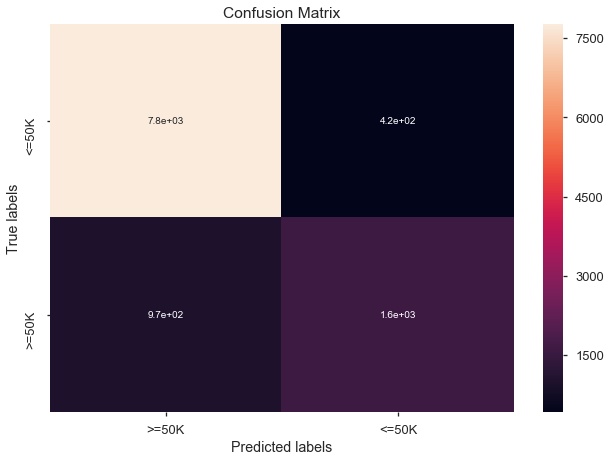

In [27]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax); #annot=True to annotate cells


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['>=50K', '<=50K']); ax.yaxis.set_ticklabels(['<=50K', '>=50K']);

In [28]:
print('------------ XGBClassifier ---------------')
print('CV_xgb f1 score: {:.2f}'.format(scores_xgb))
print('Accuracy:',accuracy_score(y_test, y_pred))
print('f1_score:',f1_score(y_test, y_pred))
print('recall_score:',recall_score(y_test, y_pred))
print('precision_score',precision_score(y_test, y_pred))

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
area = auc(recall, precision)
print("Area Under P-R Curve: ",area)

------------ XGBClassifier ---------------
CV_xgb f1 score: 0.69
Accuracy: 0.8707426018983808
f1_score: 0.6947923533289387
recall_score: 0.62
precision_score 0.7901049475262368
Area Under P-R Curve:  0.7501390175933809


Accuracy score is slightly higher as well as Area Under P-R Curve!

# Dealing with imbalanced datasets

A widely used technique for dealing with imbalanced datasets is removing samples from the majority class (down-sampling) and / or adding more examples from the minority class (up-sampling).

### 1. Down-sampling majority class

In [29]:
pd.concat([X_train, y_train], axis=1).income.value_counts()

0    16524
1     5291
Name: income, dtype: int64

In [31]:
from sklearn.utils import resample

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
low = X[X.income==0]
hight = X[X.income==1]


low_downsampled = resample(low,
                                replace = False, 
                                n_samples = len(hight),
                                random_state = 27)

# combine minority and downsampled majority
downsampled = pd.concat([low_downsampled, hight])

# checking counts
downsampled.income.value_counts()


1    5291
0    5291
Name: income, dtype: int64

##### Testing approach with XGBClassifier 

In [32]:
n_jobs = max(cpu_count()-1, 1)
X_train_d = downsampled[binary_data.columns]
y_train_d = downsampled['income']

xgb_model_down = XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=100, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1,eval_metric="aucpr")

xgb_model_down.fit(X_train_d, y_train_d, early_stopping_rounds=5, eval_set=[(X_test, y_test)])

y_pred_down = xgb_model_down.predict(X_test)


[0]	validation_0-aucpr:0.694387
Will train until validation_0-aucpr hasn't improved in 5 rounds.
[1]	validation_0-aucpr:0.694531
[2]	validation_0-aucpr:0.716598
[3]	validation_0-aucpr:0.718196
[4]	validation_0-aucpr:0.744077
[5]	validation_0-aucpr:0.744979
[6]	validation_0-aucpr:0.746348
[7]	validation_0-aucpr:0.746794
[8]	validation_0-aucpr:0.754587
[9]	validation_0-aucpr:0.765189
[10]	validation_0-aucpr:0.766982
[11]	validation_0-aucpr:0.767057
[12]	validation_0-aucpr:0.772688
[13]	validation_0-aucpr:0.776934
[14]	validation_0-aucpr:0.779903
[15]	validation_0-aucpr:0.781709
[16]	validation_0-aucpr:0.782708
[17]	validation_0-aucpr:0.783664
[18]	validation_0-aucpr:0.784628
[19]	validation_0-aucpr:0.786398
[20]	validation_0-aucpr:0.787076
[21]	validation_0-aucpr:0.788351
[22]	validation_0-aucpr:0.788985
[23]	validation_0-aucpr:0.790152
[24]	validation_0-aucpr:0.791284
[25]	validation_0-aucpr:0.791506
[26]	validation_0-aucpr:0.792182
[27]	validation_0-aucpr:0.793344
[28]	validation_0-auc

In [33]:
print('Accuracy:',accuracy_score(y_test, y_pred_down))
print('f1_score:',f1_score(y_test, y_pred_down))
print('recall_score:',recall_score(y_test, y_pred_down))
print('precision_score',precision_score(y_test, y_pred_down))

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_down)
area = auc(recall, precision)
print("Area Under P-R Curve: ",area)

Accuracy: 0.8214219244369998
f1_score: 0.6974617688790792
recall_score: 0.8674509803921568
precision_score 0.5831795412602162
Area Under P-R Curve:  0.7410420428846268


#### Our precision_score is lower, but F1 and Area Under P-R Curve are comparable with XGBClassifier without Down-sampling.

### 2. Up-sampling minority class

In [35]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
low = X[X.income==0]
hight = X[X.income==1]


# upsample minority
hight_upsampled = resample(hight,
                          replace=True, 
                          n_samples=len(low),
                          random_state=27)

# combine majority and upsampled minority
upsampled = pd.concat([low, hight_upsampled])


upsampled.income.value_counts()

1    16524
0    16524
Name: income, dtype: int64

##### Testing approach with XGBClassifier 

In [36]:
n_jobs = max(cpu_count()-1, 1)
X_train_up = upsampled[binary_data.columns]
y_train_up = upsampled['income']

xgb_model_up = XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=4,
       min_child_weight=1, missing=None, n_estimators=100, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1,eval_metric="aucpr")

xgb_model_up.fit(X_train_up, y_train_up, early_stopping_rounds=5, eval_set=[(X_test, y_test)])

y_pred_up = xgb_model_up.predict(X_test)


[0]	validation_0-aucpr:0.696402
Will train until validation_0-aucpr hasn't improved in 5 rounds.
[1]	validation_0-aucpr:0.696284
[2]	validation_0-aucpr:0.718945
[3]	validation_0-aucpr:0.72255
[4]	validation_0-aucpr:0.730991
[5]	validation_0-aucpr:0.757141
[6]	validation_0-aucpr:0.761223
[7]	validation_0-aucpr:0.763841
[8]	validation_0-aucpr:0.767568
[9]	validation_0-aucpr:0.767026
[10]	validation_0-aucpr:0.767773
[11]	validation_0-aucpr:0.773034
[12]	validation_0-aucpr:0.777844
[13]	validation_0-aucpr:0.782933
[14]	validation_0-aucpr:0.782303
[15]	validation_0-aucpr:0.783436
[16]	validation_0-aucpr:0.784665
[17]	validation_0-aucpr:0.786211
[18]	validation_0-aucpr:0.787491
[19]	validation_0-aucpr:0.788998
[20]	validation_0-aucpr:0.791042
[21]	validation_0-aucpr:0.791762
[22]	validation_0-aucpr:0.792622
[23]	validation_0-aucpr:0.792988
[24]	validation_0-aucpr:0.793329
[25]	validation_0-aucpr:0.79457
[26]	validation_0-aucpr:0.795315
[27]	validation_0-aucpr:0.796184
[28]	validation_0-aucpr

In [37]:
print('Accuracy:',accuracy_score(y_test, y_pred_up))
print('f1_score:',f1_score(y_test, y_pred_up))
print('recall_score:',recall_score(y_test, y_pred_up))
print('precision_score',precision_score(y_test, y_pred_up))

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_up)
area = auc(recall, precision)
print("Area Under P-R Curve: ",area)

Accuracy: 0.8271915131211613
f1_score: 0.7035913806863526
recall_score: 0.864313725490196
precision_score 0.5932705248990578
Area Under P-R Curve:  0.7448911387810778


#### The results are similar to previous approach

# Obtained results

([<matplotlib.axis.XTick at 0x2726e7e9c18>,
 <a list of 5 Text xticklabel objects>)

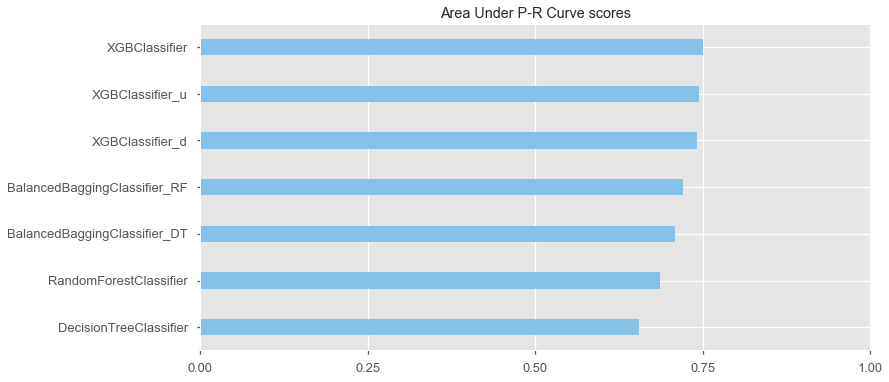

In [38]:
aucpr_scores = [0.655, 
                0.687,
                0.709, 
                0.720, 
                0.741,
                0.744,
                0.750
               ]             
estimators = ['DecisionTreeClassifier',
              'RandomForestClassifier', 
              'BalancedBaggingClassifier_DT',
              'BalancedBaggingClassifier_RF',
              'XGBClassifier_d',
              'XGBClassifier_u',
              'XGBClassifier'
             ]
style.use('ggplot')
ind = np.arange(len(estimators)) 
width = 0.35    
plt.rcParams['figure.figsize'] = 12, 6 
p = plt.barh(ind, aucpr_scores, width, color = '#85C1E9')

plt.title('Area Under P-R Curve scores')
plt.yticks(ind, (estimators))
plt.xticks(np.linspace(0, 1, 5),  )

##### Conclusion:

 XGBClassifier worked the best out of all of other models giving the highest Area Under P-R Curve scores. 

### --- Experiments with Neural network ---

In [39]:
import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.layers import Dense, Activation, Flatten
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [40]:
def create_baseline():
    # create model
    model = models.Sequential()
    
    model.add(Dense(102, input_dim=102, kernel_initializer='normal', activation='relu'))
    model.add(Dense(51, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    return model

In [41]:
estimator = KerasClassifier(build_fn=create_baseline, epochs=5, batch_size=5, verbose=1)

In [42]:
results = estimator.fit(
 X_train, y_train,
 epochs= 5,
 batch_size = 5,
 validation_data = (X_test, y_test)
)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 21815 samples, validate on 10746 samples
Epoch 1/5
21815/21815 [==============================] - 31s 1ms/step - loss: 0.5884 - acc: 0.8039 - val_loss: 0.6760 - val_acc: 0.8331: 0
Epoch 2/5
21815/21815 [==============================] - 33s 2ms/step - loss: 0.7053 - acc: 0.8280 - val_loss: 0.6664 - val_acc: 0.8383
Epoch 3/5
21815/21815 [==============================] - 20s 924us/step - loss: 0.7040 - acc: 0.8322 - val_loss: 0.6665 - val_acc: 0.8361
Epoch 4/5
21815/21815 [==============================] - 21s 955us/step - loss: 0.6971 - acc: 0.8337 - val_loss: 0.6690 - val_acc: 0.8319
Epoch 5/5
21815/21815 [==============================] - 23s 1ms/step - loss: 1.1028 - acc: 0.8151 - val_loss: 1.4726 - val_acc: 0.7997


In [43]:
y_pred = estimator.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_bool))

10746/10746 [==============================] - 0s 34us/step
              precision    recall  f1-score   support

           0       0.76      1.00      0.87      8196
           1       0.00      0.00      0.00      2550

   micro avg       0.76      0.76      0.76     10746
   macro avg       0.38      0.50      0.43     10746
weighted avg       0.58      0.76      0.66     10746



### The end

### ¯\_(ツ)_/¯